For the previous battery system, we now add a voltage sensor which gives us a noisy reading of the battery voltage after each time cycle. The measurement is $z(k)=h(q(k))+w(k)$, with $w(k)\sim\mathcal{N}(0,\sigma_w^2)$, and where $h(q)$ is a nonlinear function mapping from current state of chargeto voltage, and with $h(q)=4+(q-1)^3$.  

The battery is subject to the same discharging process as before, with $q(k)=q(k-1)-j(k-1)$, where $q(0)=1$ with no uncertainty; and $j(k)=j_0+v(k)$ with $v(k)$ zero mean with variance $\sigma_v^2$.  

For our system, we set $j_0=0.1$, $\sigma_v=0.05$, and $\sigma_w=0.1$. 

We first design an Extended Kalman ﬁlter (EKF) to estimate the state of charge:  
1) Initialization  
$$
\hat{x}_m(0)=q(0)=1, P_m(0)=0
$$  
2) Prior Update  
$$
\hat{x}_p(k)=\hat{x}_m(k-1)-j_0  \\  
A(k-1)=\left.\frac{\partial q(k)}{\partial q(k-1)}\right \vert_{q(k-1)=\hat{x}_m(k-1)}=1, L(k-1)=\left.\frac{\partial q(k)}{\partial v(k-1)}\right \vert_{v(k-1)=0}=-1, \Sigma_{vv}(k-1)=\sigma_v^2  \\  
P_p(k)=A(k-1)P_m(k-1)A(k-1)^T+L(k-1)\Sigma_{vv}(k-1)L(k-1)^T
$$  
3) Measurement Update  
$$
H(k)=\left.\frac{\partial z(k)}{\partial q(k)}\right \vert_{q(k)=\hat{x}_p(k)}=3(\hat{x}_p(k)-1)^2, M(k)=\left.\frac{\partial z(k)}{\partial w(k)}\right \vert_{w(k)=0}=1, \Sigma_{ww}(k)=\sigma_w^2  \\  
K(k)=P_p(k)H(k)^T(H(k)P_p(k)H(k)^T+M(k)\Sigma_{ww}(k)M(k)^T) \\ 
\hat{x}_m(k)=\hat{x}_p(k)+K(k)[z(k)-h(\hat{x}_p(k))] \\ 
P_m(k)=(I-K(k)H(k))P_p(k)
$$

We note that the amount of information that the EKF gets from the measurement is determined by the function $h$, and speciﬁcally its slope with respect to the state, $H(k)=\frac{\partial h}{\partial q}$. Because our system and measurements are scalar, all quantities are also scalar. We can thus easily reason about how useful a measurement is, by comparing the state variance after getting the measurement $P_m(k)$ to the variance before the measurement $P_p(k)$.  

It is easily to show that the reduction in variance due to a measurement (i.e., an indication of its informative ness) can be described as below:  
$$
\frac{P_p(k)-P_m(k)}{P_p(k)}=\frac{H(k)^2P_p(k)}{\Sigma_{ww}+H(k)^2P_p(k)}
$$  
where a a value of 1 means that the measurement removed all uncertainty, and a value of 0 means that the measurement made no diﬀerence to the uncertainty.  

Using this metric, we make a plot of the informativeness of the voltage measurement as a function of the estimated state of charge, for $\hat{q}\in[0,1]$. Set $P_p(k)=0.1$, and $\Sigma_{ww}=0.1$.

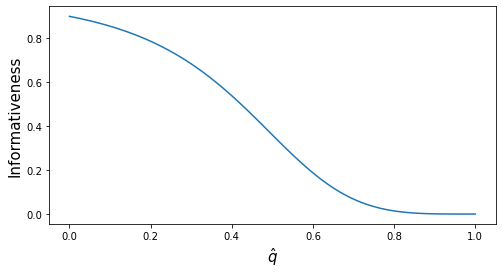

In [1]:
import numpy as np
import matplotlib.pyplot as plt

qhat = np.linspace(0, 1, 100)
H = 3 * (qhat - 1) ** 2
Pp = 0.1
Sigmaww = 0.1

I = (Pp * (H ** 2)) / (Sigmaww + H ** 2 * Pp)

plt.figure(figsize = (8, 4))

plt.plot(qhat, I)
plt.xlabel(r'$\hat q$', fontsize = 15)
plt.ylabel(r'Informativeness', fontsize = 15)

plt.show()

For the remainder of the problem, given is the following sequence of measurements:

time step $k$|1 |2 |3 |4 |5 |6 |7 |8 |9
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
$z(k)$|4.04|3.81|3.95|3.90|3.88|3.88|3.90|3.55|3.18

Run our Extended Kalman ﬁlter with this data, and generate two plots: the estimated state of charge, and the variance of this estimate, across $k$. 

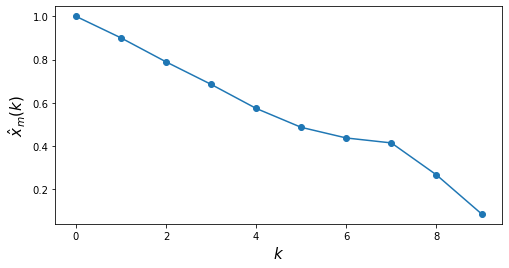

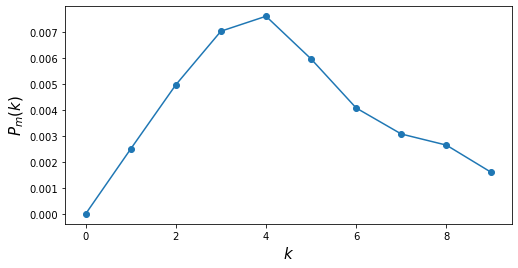

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xm0 = 1
Pm0 = 0
K = 9
j0 = 0.1
Sigmavv = 0.05 ** 2
Sigmaww = 0.1 ** 2

z = np.array([4.04, 3.81, 3.95, 3.90, 3.88, 3.88, 3.90, 3.55, 3.18])

xm = np.empty(K + 1)
Pm = np.empty(K + 1)

xm[0] = xm0
Pm[0] = Pm0

for k in range(K):
    xp = xm[k] - j0
    Pp = Pm[k] + Sigmavv
    
    H = 3 * (xp - 1) ** 2
    K = (H * Pp) / (H ** 2 * Pp + Sigmaww)
    
    xm[k + 1] = xp + K * (z[k] - 4 - (xp - 1) ** 3)
    Pm[k + 1] = (1 - K * H) * Pp
    
fig1 = plt.figure(figsize = (8, 4))

plt.plot(np.arange(10), xm, 'o-')
plt.xlabel(r'$k$', fontsize = 15)
plt.ylabel(r'$\hatx_m(k)$', fontsize = 15)

fig2 = plt.figure(figsize = (8, 4))

plt.plot(np.arange(10), Pm, 'o-')
plt.xlabel(r'$k$', fontsize = 15)
plt.ylabel(r'$P_m(k)$', fontsize = 15)

plt.show()